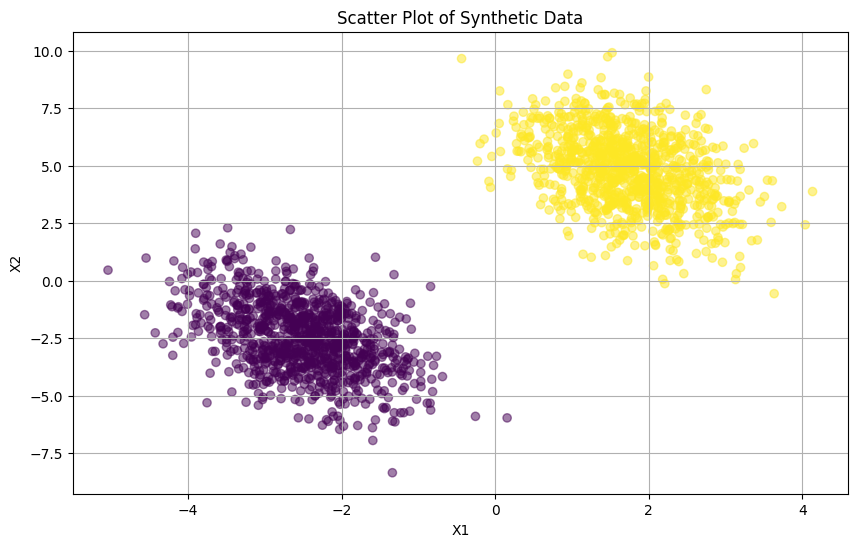

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot of Synthetic Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

Iteration 0: Loss = 0.6931
Iteration 1: Loss = 0.6499
Iteration 2: Loss = 0.6109
Iteration 3: Loss = 0.5756
Iteration 4: Loss = 0.5437
Iteration 5: Loss = 0.5148
Iteration 6: Loss = 0.4885
Iteration 7: Loss = 0.4646
Iteration 8: Loss = 0.4428
Iteration 9: Loss = 0.4228
Iteration 10: Loss = 0.4044
Iteration 11: Loss = 0.3876
Iteration 12: Loss = 0.3720
Iteration 13: Loss = 0.3577
Iteration 14: Loss = 0.3444
Iteration 15: Loss = 0.3320
Iteration 16: Loss = 0.3205
Iteration 17: Loss = 0.3098
Iteration 18: Loss = 0.2998
Iteration 19: Loss = 0.2904


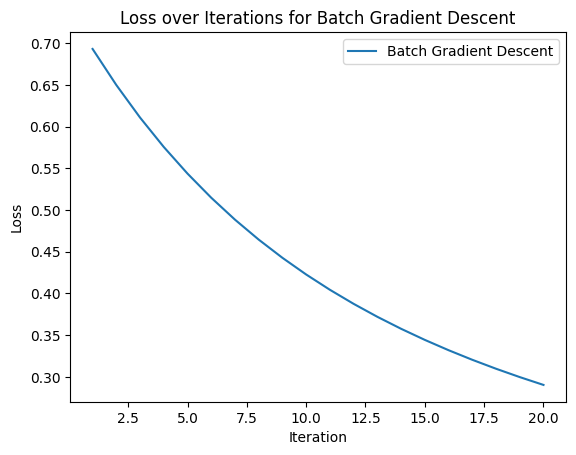

In [3]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (Logistic loss)
def compute_loss(y, y_pred):
    m = len(y)
    # Logistic loss (binary cross-entropy)
    loss = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

# Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.01, iterations=20):
    # Initialize weights with zeros (X.shape[1] = number of features)
    weights = np.zeros(X.shape[1])
    bias = 0  # Initialize bias term
    m = len(y)
    
    # Store loss for each iteration to plot later
    loss_history = []
    
    for i in range(iterations):
        # Linear model
        linear_model = np.dot(X, weights) + bias
        
        # Apply sigmoid to get predictions
        y_pred = sigmoid(linear_model)
        
        # Compute gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))  # Gradient of weights
        db = (1 / m) * np.sum(y_pred - y)         # Gradient of bias
        
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Compute the loss and store it
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)
        
        # Print progress
        #if i % 5 == 0:
        #    print(f"Iteration {i}: Loss = {loss:.4f}")
            
        print(f"Iteration {i}: Loss = {loss:.4f}")
    
    return weights, bias, loss_history

# Adding bias term to X by inserting a column of ones for intercept
X_bias = np.c_[np.ones(X.shape[0]), X]  # Adding bias term (X0 = 1)

# Run Batch Gradient Descent
weights, bias, loss_history = batch_gradient_descent(X_bias, y, learning_rate=0.01, iterations=20)

# Plot the loss over iterations
plt.plot(range(1, 21), loss_history, label='Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Batch Gradient Descent')
plt.legend()
plt.show()

Iteration 0: Loss = 0.0066
Iteration 1: Loss = 0.0036
Iteration 2: Loss = 0.0026
Iteration 3: Loss = 0.0020
Iteration 4: Loss = 0.0017
Iteration 5: Loss = 0.0014
Iteration 6: Loss = 0.0012
Iteration 7: Loss = 0.0011
Iteration 8: Loss = 0.0010
Iteration 9: Loss = 0.0009
Iteration 10: Loss = 0.0009
Iteration 11: Loss = 0.0008
Iteration 12: Loss = 0.0007
Iteration 13: Loss = 0.0007
Iteration 14: Loss = 0.0007
Iteration 15: Loss = 0.0006
Iteration 16: Loss = 0.0006
Iteration 17: Loss = 0.0006
Iteration 18: Loss = 0.0005
Iteration 19: Loss = 0.0005


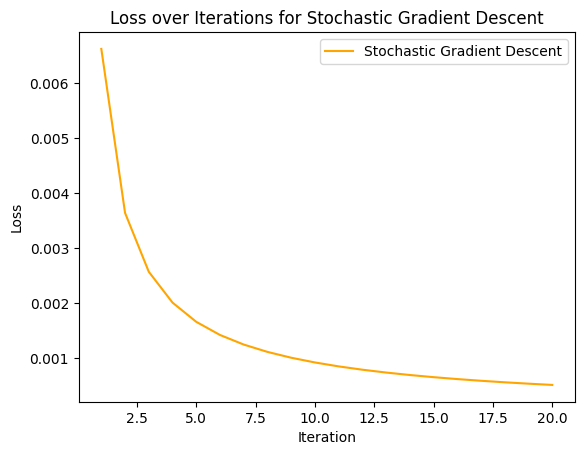

In [4]:
# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=20):
    # Initialize weights with zeros
    weights = np.zeros(X.shape[1])
    bias = 0
    m = len(y)
    
    # Store loss for each iteration to plot later
    loss_history = []
    
    for i in range(iterations):
        # Shuffle the data to ensure stochasticity in SGD
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for j in range(m):
            # Select a single training example
            X_i = X_shuffled[j, :].reshape(1, -1)
            y_i = y_shuffled[j]
            
            # Linear model
            linear_model = np.dot(X_i, weights) + bias
            
            # Apply sigmoid to get prediction
            y_pred = sigmoid(linear_model)
            
            # Compute gradients for this single example
            dw = X_i.T * (y_pred - y_i)  # Gradient of weights
            db = (y_pred - y_i)          # Gradient of bias
            
            # Update weights and bias
            weights -= learning_rate * dw.flatten()
            bias -= learning_rate * db
        
        # After each full pass over the dataset (one iteration), compute the loss
        linear_model_full = np.dot(X, weights) + bias
        y_pred_full = sigmoid(linear_model_full)
        loss = compute_loss(y, y_pred_full)
        loss_history.append(loss)
        
        # Print progress
        #if i % 5 == 0:
        #    print(f"Iteration {i}: Loss = {loss:.4f}")
        print(f"Iteration {i}: Loss = {loss:.4f}")
    
    return weights, bias, loss_history

# Run Stochastic Gradient Descent
weights_sgd, bias_sgd, loss_history_sgd = stochastic_gradient_descent(X_bias, y, learning_rate=0.01, iterations=20)

# Plot the loss over iterations
plt.plot(range(1, 21), loss_history_sgd, label='Stochastic Gradient Descent', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Stochastic Gradient Descent')
plt.legend()
plt.show()

Iteration 0: Loss = 0.6931
Iteration 1: Loss = 0.1452
Iteration 2: Loss = 0.0528
Iteration 3: Loss = 0.0203
Iteration 4: Loss = 0.0080
Iteration 5: Loss = 0.0032
Iteration 6: Loss = 0.0013
Iteration 7: Loss = 0.0005
Iteration 8: Loss = 0.0002
Iteration 9: Loss = 0.0001
Iteration 10: Loss = 0.0000
Iteration 11: Loss = 0.0000
Iteration 12: Loss = 0.0000
Iteration 13: Loss = 0.0000
Iteration 14: Loss = 0.0000
Iteration 15: Loss = 0.0000
Iteration 16: Loss = 0.0000
Iteration 17: Loss = 0.0000
Iteration 18: Loss = 0.0000
Iteration 19: Loss = 0.0000


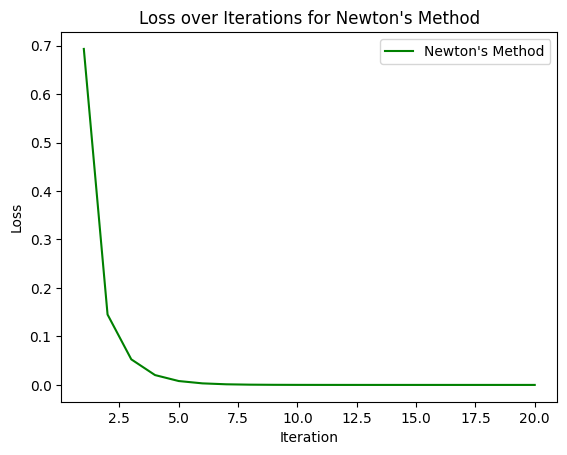

In [5]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the compute_loss function
def compute_loss(y, y_pred):
    # Using binary cross-entropy loss
    return -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))

# Implement Newton's Method
def newtons_method(X, y, iterations=20):
    # Initialize weights with zeros
    weights = np.zeros(X.shape[1])
    bias = 0
    m = len(y)
    
    # Store loss for each iteration to plot later
    loss_history = []
    
    for i in range(iterations):
        # Linear model
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        
        # Gradient
        gradient = np.dot(X.T, (y_pred - y)) / m
        # Compute Hessian matrix
        S = np.diag(y_pred * (1 - y_pred))  # Diagonal matrix
        hessian = np.dot(X.T, np.dot(S, X)) / m
        
        # Update weights and bias using Newton's method
        weights -= np.linalg.inv(hessian).dot(gradient)
        # We will update bias separately
        bias -= np.mean(y_pred - y)
        
        # Calculate the loss
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)
        
        # Print progress
        #if i % 5 == 0:
        #    print(f"Iteration {i}: Loss = {loss:.4f}")
        print(f"Iteration {i}: Loss = {loss:.4f}")
    
    return weights, bias, loss_history

# Run Newton's Method
weights_newton, bias_newton, loss_history_newton = newtons_method(X_bias, y, iterations=20)

# Plot the loss over iterations
plt.plot(range(1, 21), loss_history_newton, label='Newton\'s Method', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Newton\'s Method')
plt.legend()
plt.show()

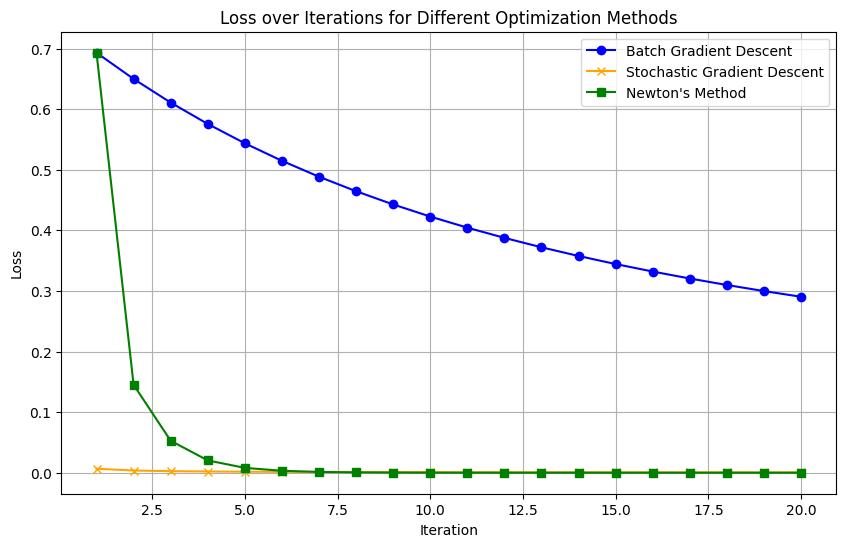

In [6]:
import matplotlib.pyplot as plt


# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), loss_history, label='Batch Gradient Descent', color='blue', marker='o')
plt.plot(range(1, 21), loss_history_sgd, label='Stochastic Gradient Descent', color='orange',  marker='x')
plt.plot(range(1, 21), loss_history_newton, label='Newton\'s Method', color='green', marker='s')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Different Optimization Methods')
plt.legend()
plt.grid()
plt.show()


Iteration 0: Loss = 0.6931
Iteration 1: Loss = 0.6865
Iteration 2: Loss = 0.6804
Iteration 3: Loss = 0.6747
Iteration 4: Loss = 0.6695
Iteration 5: Loss = 0.6647
Iteration 6: Loss = 0.6602
Iteration 7: Loss = 0.6560
Iteration 8: Loss = 0.6521
Iteration 9: Loss = 0.6485
Iteration 10: Loss = 0.6451
Iteration 11: Loss = 0.6420
Iteration 12: Loss = 0.6390
Iteration 13: Loss = 0.6362
Iteration 14: Loss = 0.6336
Iteration 15: Loss = 0.6312
Iteration 16: Loss = 0.6288
Iteration 17: Loss = 0.6266
Iteration 18: Loss = 0.6245
Iteration 19: Loss = 0.6226


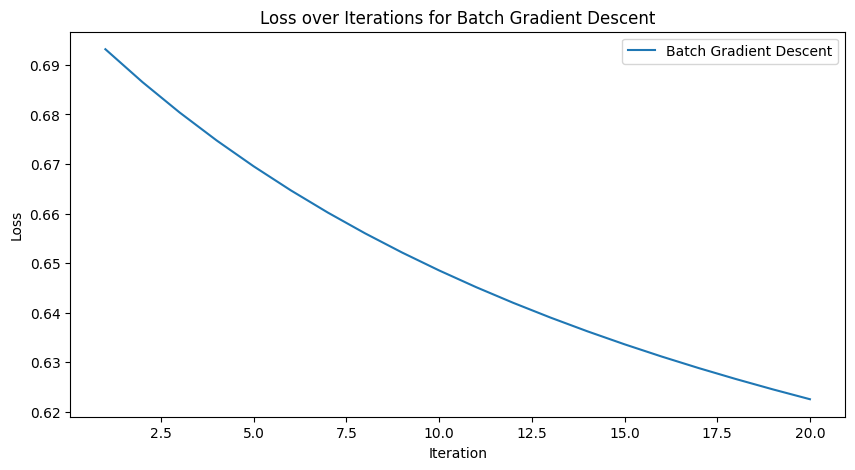

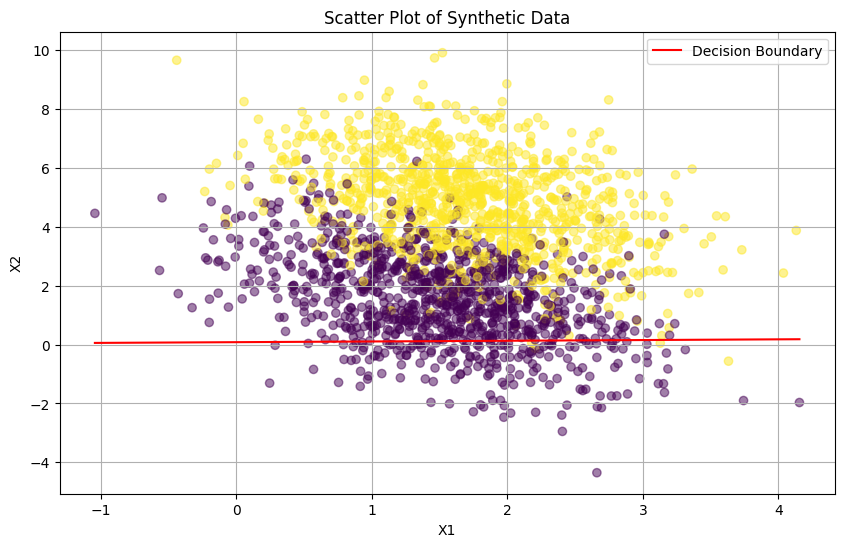

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[3, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Convert y to binary (0 and 1) for binary classification
y_binary = np.where(y == 0, 0, 1)  # Assuming two classes in the data

# Adding bias term to X
X_bias = np.c_[np.ones(X.shape[0]), X]  # Adding bias term (X0 = 1)

# Run Batch Gradient Descent
weights, bias, loss_history = batch_gradient_descent(X_bias, y_binary, learning_rate=0.01, iterations=20)

# Plot the loss over iterations
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), loss_history, label='Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Batch Gradient Descent')
plt.legend()
plt.show()

# Scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_binary, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot of Synthetic Data')

# Plot decision boundary
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = -(weights[1] * x_values + bias) / weights[2]
plt.plot(x_values, y_values, color='red', label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.legend()
plt.show()